<a href="https://colab.research.google.com/github/StockRecursiveOverflow/ML/blob/main/c4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [8]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
print(X.max(), X.min())
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

log_reg_1000 = LogisticRegression(C=1000, random_state=42)
log_reg_1000.fit(X_train, y_train)

2.5 0.1


LogisticRegression(C=1000, random_state=42)

[1.65165165]


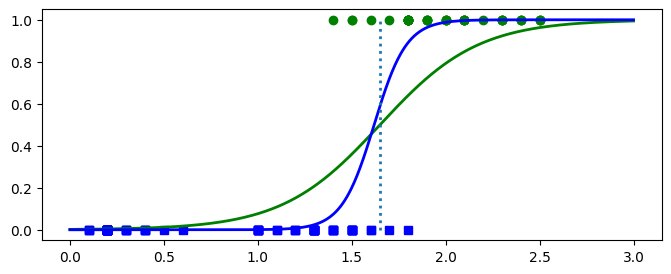

In [12]:
import matplotlib.pyplot as plt
import numpy as np

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba_1000 = log_reg_1000.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "go")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot(X_new, y_proba_1000[:, 1], "b-", linewidth=2, label="Iris virginica proba")

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)
plt.plot([decision_boundary, decision_boundary], [0, 1], ":", linewidth=2, label="decision boundary")

(2.9, 7.0, 0.8, 2.7)

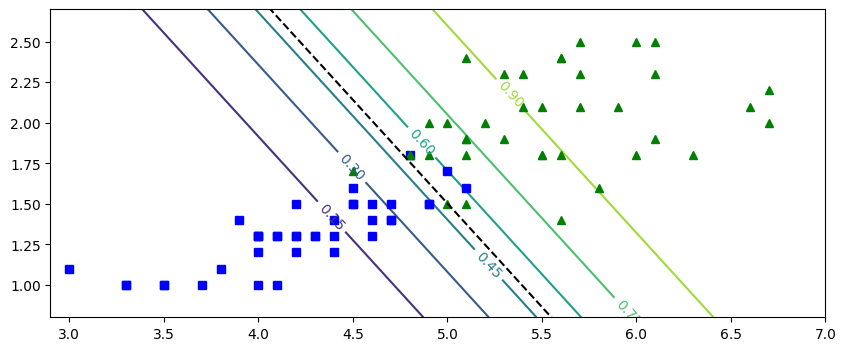

In [13]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
contour = plt.contour(x0, x1, y_proba[:, 1].reshape(x0.shape))
plt.clabel(contour, inline=1)
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot([left_right[0], left_right[1]], boundary, "k--")
plt.axis([2.9, 7, 0.8, 2.7])